# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


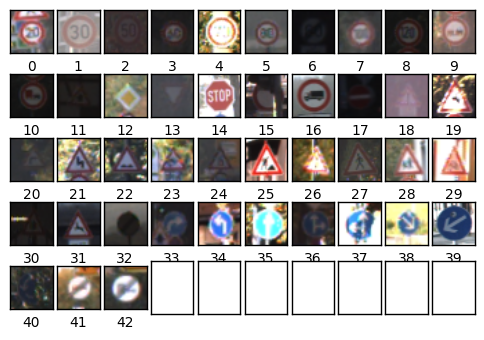

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot traffic sign images
def visualizing(X_train=X_train):
    examples = [np.where(y_train == sign)[0][0] for sign in range(n_classes)]
    figure, axes = plt.subplots(5, 10)
    figure.subplots_adjust(hspace=0.2, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        if i < n_classes:
            ax.imshow(X_train[examples[i]].squeeze())
            ax.set_xlabel("{0}".format(i))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

visualizing()

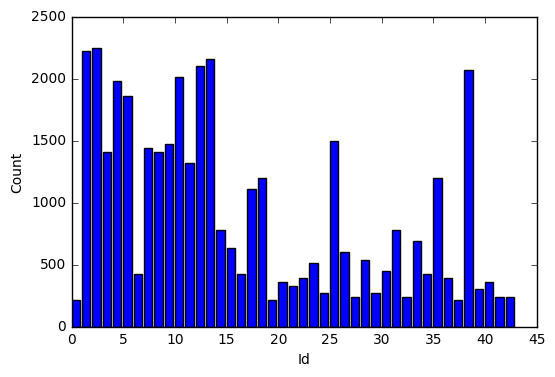

In [4]:
# Plot the count of each  sign
plt.bar(range(n_classes), [sum(y_train == sign) for sign in range(n_classes)])
plt.xlabel("Id")
plt.ylabel("Count")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def preprocessing(image):
    for i in range(3):
        image[:,:,i] = cv2.equalizeHist(image[:,:,i])
        
    return image / 255.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** For brightness normalization, histogram equalization is used on each channel; then implement the Min-Max scaling for the data which bring values of all images into the range [0, 1].

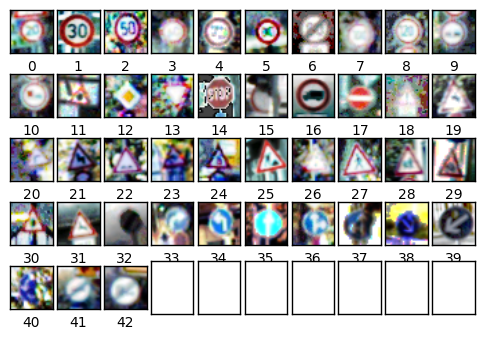

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def transforming(image, trans_range, angle_range):
    # Random rotation
    row,col,_ = image.shape
    ang_rot = np.random.uniform(angle_range)-angle_range/2
    Rot_M = cv2.getRotationMatrix2D((col/2,row/2),ang_rot,1)
    reflect = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_REFLECT)
    image = cv2.warpAffine(reflect,Rot_M,(col+20,row+20))[10:col+10,10:row+10,:]
    
    # Random translation
    trans_x = trans_range*np.random.uniform()-trans_range/2
    trans_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,trans_x],[0,1,trans_y]])
    reflect = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_REFLECT)
    image = cv2.warpAffine(reflect,Trans_M,(col+20,row+20))[10:col+10,10:row+10,:]
    
    # Brightness augmentation
    dst = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    dst[:,:,2] = dst[:,:,2]*(0.1+np.random.uniform())
    image = cv2.cvtColor(dst,cv2.COLOR_HSV2RGB)
    
    return preprocessing(image)

X_trans = np.array([transforming(image, 3, 20) for image in X_train], dtype=np.float32)
visualizing(X_trans)

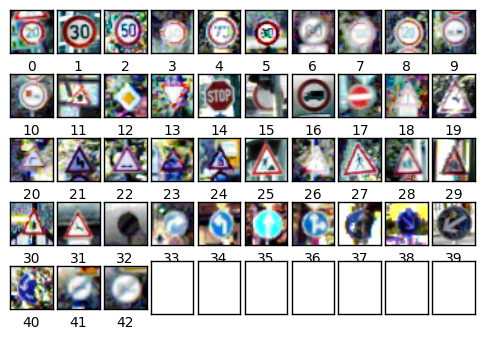

In [7]:
X_train = np.array([preprocessing(image) for image in X_train], dtype=np.float32)
visualizing(X_train)

In [8]:
X_train = np.vstack((X_train, X_trans))
X_test = np.array([preprocessing(image) for image in X_test], dtype=np.float32)
print('New data shape', X_train.shape)
y_train = np.hstack((y_train, y_train))
print('New label shape', y_train.shape)

New data shape (78418, 32, 32, 3)
New label shape (78418,)


In [9]:
from sklearn.cross_validation import train_test_split
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train[indices] = X_train
y_train[indices] = y_train
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Classes in training set', len(set(y_train)))
print('Classes in validation set', len(set(y_valid)))
print('Classes in test set', len(set(y_test)))

print('Training set', X_train.shape, ', y_train', y_train.shape)
print('Validation set', X_valid.shape, ', y_valid', y_valid.shape)
print('Test set', X_test.shape, ', y_test', y_test.shape)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Classes in training set 43
Classes in validation set 43
Classes in test set 43
Training set (62734, 32, 32, 3) , y_train (62734,)
Validation set (15684, 32, 32, 3) , y_valid (15684,)
Test set (12630, 32, 32, 3) , y_test (12630,)


In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_train = lb.transform(y_train).astype(np.float32)
y_valid = lb.transform(y_valid).astype(np.float32)
y_test = lb.transform(y_test).astype(np.float32)

import os
augmenting_file = 'augment.p'
if not os.path.isfile(augmenting_file):
    print('Caching data...')
    try:
        with open(augmenting_file, 'wb') as f:
            pickle.dump({
                'X_train': X_train,
                'y_train': y_train,
                'X_valid': X_valid,
                'y_valid': y_valid,
                'X_test': X_test,
                'y_test': y_test
            }, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Can\'t cache data: ', e)
        raise

Caching data...


In [11]:
import tensorflow as tf

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The image data is split into training and validation sets using sklearn's train_test_split function so that 80% in training data and 20% in validation data.  One additional dataset is generated by applying random rotation, random translation, and brightness augmentation to all images of the original dataset.  The random rotation is set to +/-10 degrees; then images are shifted randomly in both the x and y directions; and brightness is randomly augmented on training images.  The new data is included in order to make the neural network insensitive to these changes.  Their differences can be easily seen through the above visualization.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def conv_layer(input, num_in_channels, filter_size, num_filters, use_pooling=True):
    shape = [filter_size, filter_size, num_in_channels, num_filters]
    weights = init_weights(shape)
    biases = init_biases(num_filters)
    layer = tf.add(tf.nn.conv2d(input=input, filter = weights, strides=[1,1,1,1], padding='SAME'), biases)
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    return tf.nn.relu(layer), weights

def flatten_layer(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    return tf.reshape(layer, [-1,num_features]), num_features

def fc_layer(input, num_inputs, num_outputs, use_relu=True):
    weights = init_weights([num_inputs, num_outputs])
    biases = init_biases(num_outputs)
    layer = tf.add(tf.matmul(input, weights), biases)
    return tf.nn.relu(layer) if use_relu else layer, weights

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def init_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

img_size = 32
num_channels = 3

tf.reset_default_graph()
x_image = tf.placeholder(tf.float32, [None,img_size,img_size,num_channels], name='x')
y_true = tf.placeholder(tf.float32, [None,n_classes], name='y_true')
y_true_class = tf.argmax(y_true, dimension=1)
keep_prob = tf.placeholder(tf.float32)

# Convolutional layer 1
filter_size1 = 5
num_filters1 = 32
# Convolutional layer 2
filter_size2 = 5
num_filters2 = 32
# Convolutional layer 3
filter_size3 = 5
num_filters3 = 64
# Convolutional layer 4
filter_size4 = 5
num_filters4 = 64
# Convolutional layer 5
filter_size5 = 5
num_filters5 = 128
# Convolutional layer 6
filter_size6 = 5
num_filters6 = 128

# Fully-connected layer 1
fc_size1 = 1024
# Fully-connected layer 2
fc_size2 = 1024

layer_conv1, weights_conv1 = \
    conv_layer(input=x_image,num_in_channels=num_channels,filter_size=filter_size1,num_filters=num_filters1,use_pooling=False)
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 32, 32, 32) dtype=float32>

In [13]:
layer_conv2, weights_conv2 = \
    conv_layer(input=layer_conv1,num_in_channels=num_filters1,filter_size=filter_size2,num_filters=num_filters2)
layer_conv2_drop = tf.nn.dropout(layer_conv2, keep_prob)
layer_conv2, layer_conv2_drop

(<tf.Tensor 'Relu_1:0' shape=(?, 16, 16, 32) dtype=float32>,
 <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 32) dtype=float32>)

In [14]:
layer_conv3, weights_conv3 = \
    conv_layer(input=layer_conv2_drop,num_in_channels=num_filters2,filter_size=filter_size3,num_filters=num_filters3,use_pooling=False)
layer_conv3

<tf.Tensor 'Relu_2:0' shape=(?, 16, 16, 64) dtype=float32>

In [15]:
layer_conv4, weights_conv4 = \
    conv_layer(input=layer_conv3,num_in_channels=num_filters3,filter_size=filter_size4,num_filters=num_filters4)
layer_conv4_drop = tf.nn.dropout(layer_conv4, keep_prob)
layer_conv4, layer_conv4_drop

(<tf.Tensor 'Relu_3:0' shape=(?, 8, 8, 64) dtype=float32>,
 <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 64) dtype=float32>)

In [16]:
layer_conv5, weights_conv5 = \
    conv_layer(input=layer_conv4_drop,num_in_channels=num_filters4,filter_size=filter_size5,num_filters=num_filters5,use_pooling=False)
layer_conv5

<tf.Tensor 'Relu_4:0' shape=(?, 8, 8, 128) dtype=float32>

In [17]:
layer_conv6, weights_conv6 = \
    conv_layer(input=layer_conv5,num_in_channels=num_filters5,filter_size=filter_size6,num_filters=num_filters6)
layer_conv6_drop = tf.nn.dropout(layer_conv6, keep_prob)
layer_conv6, layer_conv6_drop

(<tf.Tensor 'Relu_5:0' shape=(?, 4, 4, 128) dtype=float32>,
 <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 128) dtype=float32>)

In [18]:
layer_flat2, num_features2 = flatten_layer(layer_conv2_drop)
layer_flat4, num_features4 = flatten_layer(layer_conv4_drop)
layer_flat6, num_features6 = flatten_layer(layer_conv6_drop)
layer_flat = tf.concat(1, [layer_flat2, layer_flat4, layer_flat6])
num_features = num_features2 + num_features4 + num_features6
layer_flat

<tf.Tensor 'concat:0' shape=(?, 14336) dtype=float32>

In [19]:
layer_fc1, weights_fc1 = fc_layer(layer_flat,num_features,fc_size1)
layer_fc1_drop = tf.nn.dropout(layer_fc1, keep_prob)
layer_fc1, layer_fc1_drop

(<tf.Tensor 'Relu_6:0' shape=(?, 1024) dtype=float32>,
 <tf.Tensor 'dropout_3/mul:0' shape=(?, 1024) dtype=float32>)

In [20]:
layer_fc2, weights_fc2 = fc_layer(layer_fc1_drop,fc_size1,fc_size2)
layer_fc2_drop = tf.nn.dropout(layer_fc2, keep_prob)
layer_fc2, layer_fc2_drop

(<tf.Tensor 'Relu_7:0' shape=(?, 1024) dtype=float32>,
 <tf.Tensor 'dropout_4/mul:0' shape=(?, 1024) dtype=float32>)

In [21]:
layer_fc3, weights_fc3 = fc_layer(layer_fc2_drop,fc_size2,n_classes,use_relu=False)
layer_fc3

<tf.Tensor 'Add_8:0' shape=(?, 43) dtype=float32>

In [22]:
y_pred = tf.nn.softmax(layer_fc3)
y_pred_class = tf.argmax(y_pred, dimension=1)
y_pred, y_pred_class

(<tf.Tensor 'Softmax:0' shape=(?, 43) dtype=float32>,
 <tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>)

In [23]:
reg = tf.nn.l2_loss(weights_conv1)+tf.nn.l2_loss(weights_conv2)+tf.nn.l2_loss(weights_conv3) \
    +tf.nn.l2_loss(weights_conv4)+tf.nn.l2_loss(weights_conv3)+tf.nn.l2_loss(weights_conv6) \
    +tf.nn.l2_loss(weights_fc1)+tf.nn.l2_loss(weights_fc2)+tf.nn.l2_loss(weights_fc3)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3,labels=y_true)
loss = tf.reduce_mean(cross_entropy)+1e-5*reg
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
batch_size = 512

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I extend the LeNet in the classroom: two 5x5x32 convolutional layers to extract low level features, then 2x2 maxpooling and dropout with the probability of 0.5 are applied, and this structure is repeated twice with num_filters 64 and 128, respectively, to identify higher level features; then the output from dropout layers is combined into a signle vector, and as input for next two fully-connected layers.

In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.
from tqdm import tqdm

epoches = 100
init = tf.initialize_all_variables()
saver = tf.train.Saver()
valid_feed_dict = {x_image: X_valid, y_true: y_valid, keep_prob: 1.0}
test_feed_dict = {x_image: X_test, y_true: y_test, keep_prob: 1.0}
validation_accuracy = 0.0
test_accuracy = 0.0

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [25]:
log_batch_step = 10
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

In [26]:
import math

session = tf.Session()
session.run(init)
batch_count = int(math.ceil(len(X_train)/batch_size))

for epoch in range(epoches):
    batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch+1, epoches), unit='batches')
    
    for batch_i in batches_pbar:
        batch_start = batch_i*batch_size
        batch_features = X_train[batch_start:batch_start+batch_size]
        batch_labels = y_train[batch_start:batch_start+batch_size]
        
        feed_dict_batch = {x_image: batch_features, y_true: batch_labels, keep_prob: 0.5}
        _, l = session.run([optimizer, loss], feed_dict = feed_dict_batch)
        
        if not batch_i % log_batch_step:
            training_accuracy = session.run(accuracy, feed_dict = feed_dict_batch)
            validation_accuracy = session.run(accuracy, feed_dict = valid_feed_dict)
            previous_batch = batches[-1] if batches else 0
            batches.append(log_batch_step + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            valid_acc_batch.append(validation_accuracy)
            
    validation_accuracy = session.run(accuracy, feed_dict = valid_feed_dict)
    print('Validation accuracy at {}'.format(validation_accuracy))
    save_path = saver.save(session, "./models/traffic_sign.ckpt")
    print("Model saved in file: %s" % save_path)
    test_accuracy = session.run(accuracy, feed_dict = test_feed_dict)
    print(epoch, 'Test accuracy at {}'.format(test_accuracy))

test_accuracy = session.run(accuracy, feed_dict = test_feed_dict)

print('Validation accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))

Epoch  1/100: 100%|██████████| 123/123 [14:37<00:00,  8.14s/batches]


Validation accuracy at 0.6530859470367432
Model saved in file: ./models/traffic_sign.ckpt


Epoch  2/100:   0%|          | 0/123 [00:00<?, ?batches/s]

0 Test accuracy at 0.6287410855293274


Epoch  2/100: 100%|██████████| 123/123 [14:37<00:00,  8.13s/batches]


Validation accuracy at 0.8778373003005981
Model saved in file: ./models/traffic_sign.ckpt


Epoch  3/100:   0%|          | 0/123 [00:00<?, ?batches/s]

1 Test accuracy at 0.8433887362480164


Epoch  3/100: 100%|██████████| 123/123 [14:37<00:00,  8.16s/batches]


Validation accuracy at 0.930056095123291
Model saved in file: ./models/traffic_sign.ckpt


Epoch  4/100:   0%|          | 0/123 [00:00<?, ?batches/s]

2 Test accuracy at 0.8892319798469543


Epoch  4/100: 100%|██████████| 123/123 [14:37<00:00,  8.15s/batches]


Validation accuracy at 0.9515429735183716
Model saved in file: ./models/traffic_sign.ckpt


Epoch  5/100:   0%|          | 0/123 [00:00<?, ?batches/s]

3 Test accuracy at 0.9076801538467407


Epoch  5/100: 100%|██████████| 123/123 [14:37<00:00,  8.14s/batches]


Validation accuracy at 0.9683753848075867
Model saved in file: ./models/traffic_sign.ckpt


Epoch  6/100:   0%|          | 0/123 [00:00<?, ?batches/s]

4 Test accuracy at 0.9182106256484985


Epoch  6/100: 100%|██████████| 123/123 [14:37<00:00,  8.14s/batches]


Validation accuracy at 0.9775567650794983
Model saved in file: ./models/traffic_sign.ckpt


Epoch  7/100:   0%|          | 0/123 [00:00<?, ?batches/s]

5 Test accuracy at 0.935154378414154


Epoch  7/100: 100%|██████████| 123/123 [14:36<00:00,  8.13s/batches]


Validation accuracy at 0.9835501313209534
Model saved in file: ./models/traffic_sign.ckpt


Epoch  8/100:   0%|          | 0/123 [00:00<?, ?batches/s]

6 Test accuracy at 0.9365003705024719


Epoch  8/100: 100%|██████████| 123/123 [14:38<00:00,  8.14s/batches]


Validation accuracy at 0.9870568513870239
Model saved in file: ./models/traffic_sign.ckpt


Epoch  9/100:   0%|          | 0/123 [00:00<?, ?batches/s]

7 Test accuracy at 0.9447347521781921


Epoch  9/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9869293570518494
Model saved in file: ./models/traffic_sign.ckpt


Epoch 10/100:   0%|          | 0/123 [00:00<?, ?batches/s]

8 Test accuracy at 0.9446555972099304


Epoch 10/100: 100%|██████████| 123/123 [14:37<00:00,  8.14s/batches]


Validation accuracy at 0.9897347688674927
Model saved in file: ./models/traffic_sign.ckpt


Epoch 11/100:   0%|          | 0/123 [00:00<?, ?batches/s]

9 Test accuracy at 0.9462391138076782


Epoch 11/100: 100%|██████████| 123/123 [14:37<00:00,  8.15s/batches]


Validation accuracy at 0.991073727607727
Model saved in file: ./models/traffic_sign.ckpt


Epoch 12/100:   0%|          | 0/123 [00:00<?, ?batches/s]

10 Test accuracy at 0.949564516544342


Epoch 12/100: 100%|██████████| 123/123 [14:37<00:00,  8.16s/batches]


Validation accuracy at 0.9921576380729675
Model saved in file: ./models/traffic_sign.ckpt


Epoch 13/100:   0%|          | 0/123 [00:00<?, ?batches/s]

11 Test accuracy at 0.9468725323677063


Epoch 13/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9921576380729675
Model saved in file: ./models/traffic_sign.ckpt


Epoch 14/100:   0%|          | 0/123 [00:00<?, ?batches/s]

12 Test accuracy at 0.9492478370666504


Epoch 14/100: 100%|██████████| 123/123 [14:38<00:00,  8.13s/batches]


Validation accuracy at 0.9936240911483765
Model saved in file: ./models/traffic_sign.ckpt


Epoch 15/100:   0%|          | 0/123 [00:00<?, ?batches/s]

13 Test accuracy at 0.9522565603256226


Epoch 15/100: 100%|██████████| 123/123 [14:37<00:00,  8.15s/batches]


Validation accuracy at 0.9931777715682983
Model saved in file: ./models/traffic_sign.ckpt


Epoch 16/100:   0%|          | 0/123 [00:00<?, ?batches/s]

14 Test accuracy at 0.9505938291549683


Epoch 16/100: 100%|██████████| 123/123 [14:38<00:00,  8.17s/batches]


Validation accuracy at 0.9939428567886353
Model saved in file: ./models/traffic_sign.ckpt


Epoch 17/100:   0%|          | 0/123 [00:00<?, ?batches/s]

15 Test accuracy at 0.957640528678894


Epoch 17/100: 100%|██████████| 123/123 [14:38<00:00,  8.17s/batches]


Validation accuracy at 0.9929227232933044
Model saved in file: ./models/traffic_sign.ckpt


Epoch 18/100:   0%|          | 0/123 [00:00<?, ?batches/s]

16 Test accuracy at 0.9509897232055664


Epoch 18/100: 100%|██████████| 123/123 [14:38<00:00,  8.14s/batches]


Validation accuracy at 0.9936878085136414
Model saved in file: ./models/traffic_sign.ckpt


Epoch 19/100:   0%|          | 0/123 [00:00<?, ?batches/s]

17 Test accuracy at 0.9535233378410339


Epoch 19/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9941979050636292
Model saved in file: ./models/traffic_sign.ckpt


Epoch 20/100:   0%|          | 0/123 [00:00<?, ?batches/s]

18 Test accuracy at 0.9554235935211182


Epoch 20/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9948992729187012
Model saved in file: ./models/traffic_sign.ckpt


Epoch 21/100:   0%|          | 0/123 [00:00<?, ?batches/s]

19 Test accuracy at 0.9577197432518005


Epoch 21/100: 100%|██████████| 123/123 [14:38<00:00,  8.14s/batches]


Validation accuracy at 0.9943891763687134
Model saved in file: ./models/traffic_sign.ckpt


Epoch 22/100:   0%|          | 0/123 [00:00<?, ?batches/s]

20 Test accuracy at 0.9547110199928284


Epoch 22/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9948354959487915
Model saved in file: ./models/traffic_sign.ckpt


Epoch 23/100:   0%|          | 0/123 [00:00<?, ?batches/s]

21 Test accuracy at 0.9574821591377258


Epoch 23/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9945804476737976
Model saved in file: ./models/traffic_sign.ckpt


Epoch 24/100:   0%|          | 0/123 [00:00<?, ?batches/s]

22 Test accuracy at 0.9600949883460999


Epoch 24/100: 100%|██████████| 123/123 [14:38<00:00,  8.15s/batches]


Validation accuracy at 0.9946442246437073
Model saved in file: ./models/traffic_sign.ckpt


Epoch 25/100:   0%|          | 0/123 [00:00<?, ?batches/s]

23 Test accuracy at 0.956769585609436


Epoch 25/100: 100%|██████████| 123/123 [14:39<00:00,  8.17s/batches]


Validation accuracy at 0.9938791394233704
Model saved in file: ./models/traffic_sign.ckpt


Epoch 26/100:   0%|          | 0/123 [00:00<?, ?batches/s]

24 Test accuracy at 0.9505146741867065


Epoch 26/100: 100%|██████████| 123/123 [14:38<00:00,  8.14s/batches]


Validation accuracy at 0.9941979050636292
Model saved in file: ./models/traffic_sign.ckpt


Epoch 27/100:   0%|          | 0/123 [00:00<?, ?batches/s]

25 Test accuracy at 0.9580364227294922


Epoch 27/100: 100%|██████████| 123/123 [14:39<00:00,  8.16s/batches]


Validation accuracy at 0.9955368638038635
Model saved in file: ./models/traffic_sign.ckpt


Epoch 28/100:   0%|          | 0/123 [00:00<?, ?batches/s]

26 Test accuracy at 0.9598574638366699


Epoch 28/100: 100%|██████████| 123/123 [14:40<00:00,  8.15s/batches]


Validation accuracy at 0.9942616820335388
Model saved in file: ./models/traffic_sign.ckpt


Epoch 29/100:   0%|          | 0/123 [00:00<?, ?batches/s]

27 Test accuracy at 0.9584323167800903


Epoch 29/100: 100%|██████████| 123/123 [14:40<00:00,  8.16s/batches]


Validation accuracy at 0.9936878085136414
Model saved in file: ./models/traffic_sign.ckpt


Epoch 30/100:   0%|          | 0/123 [00:00<?, ?batches/s]

28 Test accuracy at 0.9549485445022583


Epoch 30/100: 100%|██████████| 123/123 [14:40<00:00,  8.16s/batches]


Validation accuracy at 0.9948992729187012
Model saved in file: ./models/traffic_sign.ckpt


Epoch 31/100:   0%|          | 0/123 [00:00<?, ?batches/s]

29 Test accuracy at 0.9560570120811462


Epoch 31/100: 100%|██████████| 123/123 [14:39<00:00,  8.16s/batches]


Validation accuracy at 0.9948354959487915
Model saved in file: ./models/traffic_sign.ckpt


Epoch 32/100:   0%|          | 0/123 [00:00<?, ?batches/s]

30 Test accuracy at 0.9599366784095764


Epoch 32/100: 100%|██████████| 123/123 [14:40<00:00,  8.16s/batches]


Validation accuracy at 0.9948354959487915
Model saved in file: ./models/traffic_sign.ckpt


Epoch 33/100:   0%|          | 0/123 [00:00<?, ?batches/s]

31 Test accuracy at 0.9566904306411743


Epoch 33/100: 100%|██████████| 123/123 [14:41<00:00,  8.17s/batches]


Validation accuracy at 0.9955368638038635
Model saved in file: ./models/traffic_sign.ckpt


Epoch 34/100:   0%|          | 0/123 [00:00<?, ?batches/s]

32 Test accuracy at 0.9615993499755859


Epoch 34/100: 100%|██████████| 123/123 [14:40<00:00,  8.17s/batches]


Validation accuracy at 0.9950905442237854
Model saved in file: ./models/traffic_sign.ckpt


Epoch 35/100:   0%|          | 0/123 [00:00<?, ?batches/s]

33 Test accuracy at 0.9620743989944458


Epoch 35/100: 100%|██████████| 123/123 [14:42<00:00,  8.19s/batches]


Validation accuracy at 0.9945804476737976
Model saved in file: ./models/traffic_sign.ckpt


Epoch 36/100:   0%|          | 0/123 [00:00<?, ?batches/s]

34 Test accuracy at 0.9560570120811462


Epoch 36/100: 100%|██████████| 123/123 [14:44<00:00,  8.17s/batches]


Validation accuracy at 0.9958556294441223
Model saved in file: ./models/traffic_sign.ckpt


Epoch 37/100:   0%|          | 0/123 [00:00<?, ?batches/s]

35 Test accuracy at 0.960490882396698


Epoch 37/100: 100%|██████████| 123/123 [14:44<00:00,  8.21s/batches]


Validation accuracy at 0.9943891763687134
Model saved in file: ./models/traffic_sign.ckpt


Epoch 38/100:   0%|          | 0/123 [00:00<?, ?batches/s]

36 Test accuracy at 0.9602533578872681


Epoch 38/100: 100%|██████████| 123/123 [14:45<00:00,  8.17s/batches]


Validation accuracy at 0.9950267672538757
Model saved in file: ./models/traffic_sign.ckpt


Epoch 39/100:   0%|          | 0/123 [00:00<?, ?batches/s]

37 Test accuracy at 0.957878053188324


Epoch 39/100: 100%|██████████| 123/123 [14:49<00:00,  8.17s/batches]


Validation accuracy at 0.9947717189788818
Model saved in file: ./models/traffic_sign.ckpt


Epoch 40/100:   0%|          | 0/123 [00:00<?, ?batches/s]

38 Test accuracy at 0.958511471748352


Epoch 40/100: 100%|██████████| 123/123 [14:50<00:00,  8.23s/batches]


Validation accuracy at 0.9953455924987793
Model saved in file: ./models/traffic_sign.ckpt


Epoch 41/100:   0%|          | 0/123 [00:00<?, ?batches/s]

39 Test accuracy at 0.9574821591377258


Epoch 41/100: 100%|██████████| 123/123 [14:47<00:00,  8.30s/batches]


Validation accuracy at 0.9950905442237854
Model saved in file: ./models/traffic_sign.ckpt


Epoch 42/100:   0%|          | 0/123 [00:00<?, ?batches/s]

40 Test accuracy at 0.9612826704978943


Epoch 42/100: 100%|██████████| 123/123 [14:49<00:00,  8.29s/batches]


Validation accuracy at 0.9953455924987793
Model saved in file: ./models/traffic_sign.ckpt


Epoch 43/100:   0%|          | 0/123 [00:00<?, ?batches/s]

41 Test accuracy at 0.960490882396698


Epoch 43/100: 100%|██████████| 123/123 [14:49<00:00,  8.18s/batches]


Validation accuracy at 0.9953455924987793
Model saved in file: ./models/traffic_sign.ckpt


Epoch 44/100:   0%|          | 0/123 [00:00<?, ?batches/s]

42 Test accuracy at 0.962232768535614


Epoch 44/100: 100%|██████████| 123/123 [14:49<00:00,  8.19s/batches]


Validation accuracy at 0.9952818155288696
Model saved in file: ./models/traffic_sign.ckpt


Epoch 45/100:   0%|          | 0/123 [00:00<?, ?batches/s]

43 Test accuracy at 0.9627078175544739


Epoch 45/100: 100%|██████████| 123/123 [14:50<00:00,  8.22s/batches]


Validation accuracy at 0.9951543211936951
Model saved in file: ./models/traffic_sign.ckpt


Epoch 46/100:   0%|          | 0/123 [00:00<?, ?batches/s]

44 Test accuracy at 0.9646080732345581


Epoch 46/100: 100%|██████████| 123/123 [14:52<00:00,  8.20s/batches]


Validation accuracy at 0.9955368638038635
Model saved in file: ./models/traffic_sign.ckpt


Epoch 47/100:   0%|          | 0/123 [00:00<?, ?batches/s]

45 Test accuracy at 0.9664291143417358


Epoch 47/100: 100%|██████████| 123/123 [14:57<00:00,  8.34s/batches]


Validation accuracy at 0.9957919120788574
Model saved in file: ./models/traffic_sign.ckpt


Epoch 48/100:   0%|          | 0/123 [00:00<?, ?batches/s]

46 Test accuracy at 0.9577197432518005


Epoch 48/100: 100%|██████████| 123/123 [14:54<00:00,  8.25s/batches]


Validation accuracy at 0.9950267672538757
Model saved in file: ./models/traffic_sign.ckpt


Epoch 49/100:   0%|          | 0/123 [00:00<?, ?batches/s]

47 Test accuracy at 0.9610451459884644


Epoch 49/100: 100%|██████████| 123/123 [14:52<00:00,  8.22s/batches]


Validation accuracy at 0.995919406414032
Model saved in file: ./models/traffic_sign.ckpt


Epoch 50/100:   0%|          | 0/123 [00:00<?, ?batches/s]

48 Test accuracy at 0.9615201950073242


Epoch 50/100: 100%|██████████| 123/123 [15:00<00:00,  8.28s/batches]


Validation accuracy at 0.9956006407737732
Model saved in file: ./models/traffic_sign.ckpt


Epoch 51/100:   0%|          | 0/123 [00:00<?, ?batches/s]

49 Test accuracy at 0.9571654796600342


Epoch 51/100: 100%|██████████| 123/123 [15:04<00:00,  8.60s/batches]


Validation accuracy at 0.9953455924987793
Model saved in file: ./models/traffic_sign.ckpt


Epoch 52/100:   0%|          | 0/123 [00:00<?, ?batches/s]

50 Test accuracy at 0.9594615697860718


Epoch 52/100: 100%|██████████| 123/123 [15:04<00:00,  8.25s/batches]


Validation accuracy at 0.9959831833839417
Model saved in file: ./models/traffic_sign.ckpt


Epoch 53/100:   0%|          | 0/123 [00:00<?, ?batches/s]

51 Test accuracy at 0.9612034559249878


Epoch 53/100: 100%|██████████| 123/123 [14:57<00:00,  8.29s/batches]


Validation accuracy at 0.9960469007492065
Model saved in file: ./models/traffic_sign.ckpt


Epoch 54/100:   0%|          | 0/123 [00:00<?, ?batches/s]

52 Test accuracy at 0.9612826704978943


Epoch 54/100: 100%|██████████| 123/123 [15:11<00:00,  8.40s/batches]


Validation accuracy at 0.9956643581390381
Model saved in file: ./models/traffic_sign.ckpt


Epoch 55/100:   0%|          | 0/123 [00:00<?, ?batches/s]

53 Test accuracy at 0.9565320611000061


Epoch 55/100: 100%|██████████| 123/123 [15:14<00:00,  8.33s/batches]


Validation accuracy at 0.9950267672538757
Model saved in file: ./models/traffic_sign.ckpt


Epoch 56/100:   0%|          | 0/123 [00:00<?, ?batches/s]

54 Test accuracy at 0.9511480331420898


Epoch 56/100: 100%|██████████| 123/123 [15:14<00:00,  8.42s/batches]


Validation accuracy at 0.9964295029640198
Model saved in file: ./models/traffic_sign.ckpt


Epoch 57/100:   0%|          | 0/123 [00:00<?, ?batches/s]

55 Test accuracy at 0.9615201950073242


Epoch 57/100: 100%|██████████| 123/123 [15:21<00:00,  8.53s/batches]


Validation accuracy at 0.9958556294441223
Model saved in file: ./models/traffic_sign.ckpt


Epoch 58/100:   0%|          | 0/123 [00:00<?, ?batches/s]

56 Test accuracy at 0.962232768535614


Epoch 58/100: 100%|██████████| 123/123 [15:24<00:00,  8.57s/batches]


Validation accuracy at 0.9960469007492065
Model saved in file: ./models/traffic_sign.ckpt


Epoch 59/100:   0%|          | 0/123 [00:00<?, ?batches/s]

57 Test accuracy at 0.9634996056556702


Epoch 59/100: 100%|██████████| 123/123 [15:16<00:00,  8.41s/batches]


Validation accuracy at 0.9961744546890259
Model saved in file: ./models/traffic_sign.ckpt


Epoch 60/100:   0%|          | 0/123 [00:00<?, ?batches/s]

58 Test accuracy at 0.9601742029190063


Epoch 60/100: 100%|██████████| 123/123 [15:17<00:00,  8.45s/batches]


Validation accuracy at 0.9965569972991943
Model saved in file: ./models/traffic_sign.ckpt


Epoch 61/100:   0%|          | 0/123 [00:00<?, ?batches/s]

59 Test accuracy at 0.9627870321273804


Epoch 61/100: 100%|██████████| 123/123 [15:17<00:00,  8.41s/batches]


Validation accuracy at 0.9956006407737732
Model saved in file: ./models/traffic_sign.ckpt


Epoch 62/100:   0%|          | 0/123 [00:00<?, ?batches/s]

60 Test accuracy at 0.9591448903083801


Epoch 62/100: 100%|██████████| 123/123 [15:11<00:00,  8.45s/batches]


Validation accuracy at 0.9957281351089478
Model saved in file: ./models/traffic_sign.ckpt


Epoch 63/100:   0%|          | 0/123 [00:00<?, ?batches/s]

61 Test accuracy at 0.958748996257782


Epoch 63/100: 100%|██████████| 123/123 [15:09<00:00,  8.46s/batches]


Validation accuracy at 0.9962382316589355
Model saved in file: ./models/traffic_sign.ckpt


Epoch 64/100:   0%|          | 0/123 [00:00<?, ?batches/s]

62 Test accuracy at 0.962232768535614


Epoch 64/100: 100%|██████████| 123/123 [15:04<00:00,  8.39s/batches]


Validation accuracy at 0.99521803855896
Model saved in file: ./models/traffic_sign.ckpt


Epoch 65/100:   0%|          | 0/123 [00:00<?, ?batches/s]

63 Test accuracy at 0.9586698412895203


Epoch 65/100: 100%|██████████| 123/123 [15:13<00:00,  8.52s/batches]


Validation accuracy at 0.9961106777191162
Model saved in file: ./models/traffic_sign.ckpt


Epoch 66/100:   0%|          | 0/123 [00:00<?, ?batches/s]

64 Test accuracy at 0.9629453420639038


Epoch 66/100: 100%|██████████| 123/123 [15:19<00:00,  8.44s/batches]


Validation accuracy at 0.9963657259941101
Model saved in file: ./models/traffic_sign.ckpt


Epoch 67/100:   0%|          | 0/123 [00:00<?, ?batches/s]

65 Test accuracy at 0.965716540813446


Epoch 67/100: 100%|██████████| 123/123 [15:20<00:00,  8.49s/batches]


Validation accuracy at 0.9957919120788574
Model saved in file: ./models/traffic_sign.ckpt


Epoch 68/100:   0%|          | 0/123 [00:00<?, ?batches/s]

66 Test accuracy at 0.9586698412895203


Epoch 68/100: 100%|██████████| 123/123 [15:21<00:00,  8.52s/batches]


Validation accuracy at 0.9963019490242004
Model saved in file: ./models/traffic_sign.ckpt


Epoch 69/100:   0%|          | 0/123 [00:00<?, ?batches/s]

67 Test accuracy at 0.9607284069061279


Epoch 69/100: 100%|██████████| 123/123 [15:25<00:00,  8.50s/batches]


Validation accuracy at 0.9958556294441223
Model saved in file: ./models/traffic_sign.ckpt


Epoch 70/100:   0%|          | 0/123 [00:00<?, ?batches/s]

68 Test accuracy at 0.9646872282028198


Epoch 70/100: 100%|██████████| 123/123 [15:36<00:00,  8.50s/batches]


Validation accuracy at 0.9957919120788574
Model saved in file: ./models/traffic_sign.ckpt


Epoch 71/100:   0%|          | 0/123 [00:00<?, ?batches/s]

69 Test accuracy at 0.964845597743988


Epoch 71/100: 100%|██████████| 123/123 [15:38<00:00,  8.52s/batches]


Validation accuracy at 0.9954730868339539
Model saved in file: ./models/traffic_sign.ckpt


Epoch 72/100:   0%|          | 0/123 [00:00<?, ?batches/s]

70 Test accuracy at 0.9594615697860718


Epoch 72/100: 100%|██████████| 123/123 [15:43<00:00,  8.58s/batches]


Validation accuracy at 0.9956006407737732
Model saved in file: ./models/traffic_sign.ckpt


Epoch 73/100:   0%|          | 0/123 [00:00<?, ?batches/s]

71 Test accuracy at 0.9657956957817078


Epoch 73/100: 100%|██████████| 123/123 [15:38<00:00,  8.61s/batches]


Validation accuracy at 0.9963019490242004
Model saved in file: ./models/traffic_sign.ckpt


Epoch 74/100:   0%|          | 0/123 [00:00<?, ?batches/s]

72 Test accuracy at 0.9657956957817078


Epoch 74/100: 100%|██████████| 123/123 [15:42<00:00,  8.64s/batches]


Validation accuracy at 0.9962382316589355
Model saved in file: ./models/traffic_sign.ckpt


Epoch 75/100:   0%|          | 0/123 [00:00<?, ?batches/s]

73 Test accuracy at 0.9673792719841003


Epoch 75/100: 100%|██████████| 123/123 [15:44<00:00,  8.64s/batches]


Validation accuracy at 0.9960469007492065
Model saved in file: ./models/traffic_sign.ckpt


Epoch 76/100:   0%|          | 0/123 [00:00<?, ?batches/s]

74 Test accuracy at 0.9626286625862122


Epoch 76/100: 100%|██████████| 123/123 [15:46<00:00,  8.73s/batches]


Validation accuracy at 0.9947080016136169
Model saved in file: ./models/traffic_sign.ckpt


Epoch 77/100:   0%|          | 0/123 [00:00<?, ?batches/s]

75 Test accuracy at 0.9551860690116882


Epoch 77/100: 100%|██████████| 123/123 [15:42<00:00,  8.62s/batches]


Validation accuracy at 0.9962382316589355
Model saved in file: ./models/traffic_sign.ckpt


Epoch 78/100:   0%|          | 0/123 [00:00<?, ?batches/s]

76 Test accuracy at 0.9634204506874084


Epoch 78/100: 100%|██████████| 123/123 [15:36<00:00,  8.67s/batches]


Validation accuracy at 0.9961106777191162
Model saved in file: ./models/traffic_sign.ckpt


Epoch 79/100:   0%|          | 0/123 [00:00<?, ?batches/s]

77 Test accuracy at 0.9627078175544739


Epoch 79/100: 100%|██████████| 123/123 [15:36<00:00,  8.55s/batches]


Validation accuracy at 0.9964932203292847
Model saved in file: ./models/traffic_sign.ckpt


Epoch 80/100:   0%|          | 0/123 [00:00<?, ?batches/s]

78 Test accuracy at 0.9640538692474365


Epoch 80/100: 100%|██████████| 123/123 [15:29<00:00,  8.48s/batches]


Validation accuracy at 0.995919406414032
Model saved in file: ./models/traffic_sign.ckpt


Epoch 81/100:   0%|          | 0/123 [00:00<?, ?batches/s]

79 Test accuracy at 0.9673792719841003


Epoch 81/100: 100%|██████████| 123/123 [15:21<00:00,  8.46s/batches]


Validation accuracy at 0.9963657259941101
Model saved in file: ./models/traffic_sign.ckpt


Epoch 82/100:   0%|          | 0/123 [00:00<?, ?batches/s]

80 Test accuracy at 0.9667458534240723


Epoch 82/100: 100%|██████████| 123/123 [15:33<00:00,  8.53s/batches]


Validation accuracy at 0.9963019490242004
Model saved in file: ./models/traffic_sign.ckpt


Epoch 83/100:   0%|          | 0/123 [00:00<?, ?batches/s]

81 Test accuracy at 0.9654790163040161


Epoch 83/100: 100%|██████████| 123/123 [15:39<00:00,  8.59s/batches]


Validation accuracy at 0.9961106777191162
Model saved in file: ./models/traffic_sign.ckpt


Epoch 84/100:   0%|          | 0/123 [00:00<?, ?batches/s]

82 Test accuracy at 0.9662708044052124


Epoch 84/100: 100%|██████████| 123/123 [15:46<00:00,  8.86s/batches]


Validation accuracy at 0.9962382316589355
Model saved in file: ./models/traffic_sign.ckpt


Epoch 85/100:   0%|          | 0/123 [00:00<?, ?batches/s]

83 Test accuracy at 0.965083122253418


Epoch 85/100: 100%|██████████| 123/123 [15:53<00:00,  8.69s/batches]


Validation accuracy at 0.9965569972991943
Model saved in file: ./models/traffic_sign.ckpt


Epoch 86/100:   0%|          | 0/123 [00:00<?, ?batches/s]

84 Test accuracy at 0.9667458534240723


Epoch 86/100: 100%|██████████| 123/123 [15:50<00:00,  8.62s/batches]


Validation accuracy at 0.9949629902839661
Model saved in file: ./models/traffic_sign.ckpt


Epoch 87/100:   0%|          | 0/123 [00:00<?, ?batches/s]

85 Test accuracy at 0.9571654796600342


Epoch 87/100: 100%|██████████| 123/123 [15:38<00:00,  8.65s/batches]


Validation accuracy at 0.9957919120788574
Model saved in file: ./models/traffic_sign.ckpt


Epoch 88/100:   0%|          | 0/123 [00:00<?, ?batches/s]

86 Test accuracy at 0.9666666388511658


Epoch 88/100: 100%|██████████| 123/123 [15:40<00:00,  8.61s/batches]


Validation accuracy at 0.9956643581390381
Model saved in file: ./models/traffic_sign.ckpt


Epoch 89/100:   0%|          | 0/123 [00:00<?, ?batches/s]

87 Test accuracy at 0.9566112160682678


Epoch 89/100: 100%|██████████| 123/123 [15:37<00:00,  8.53s/batches]


Validation accuracy at 0.9962382316589355
Model saved in file: ./models/traffic_sign.ckpt


Epoch 90/100:   0%|          | 0/123 [00:00<?, ?batches/s]

88 Test accuracy at 0.9681710004806519


Epoch 90/100: 100%|██████████| 123/123 [15:45<00:00,  8.58s/batches]


Validation accuracy at 0.9964295029640198
Model saved in file: ./models/traffic_sign.ckpt


Epoch 91/100:   0%|          | 0/123 [00:00<?, ?batches/s]

89 Test accuracy at 0.9656373858451843


Epoch 91/100: 100%|██████████| 123/123 [15:38<00:00,  8.49s/batches]


Validation accuracy at 0.9966844916343689
Model saved in file: ./models/traffic_sign.ckpt


Epoch 92/100:   0%|          | 0/123 [00:00<?, ?batches/s]

90 Test accuracy at 0.9635787606239319


Epoch 92/100: 100%|██████████| 123/123 [15:30<00:00,  8.58s/batches]


Validation accuracy at 0.9964295029640198
Model saved in file: ./models/traffic_sign.ckpt


Epoch 93/100:   0%|          | 0/123 [00:00<?, ?batches/s]

91 Test accuracy at 0.9672209024429321


Epoch 93/100: 100%|██████████| 123/123 [15:45<00:00,  8.71s/batches]


Validation accuracy at 0.996620774269104
Model saved in file: ./models/traffic_sign.ckpt


Epoch 94/100:   0%|          | 0/123 [00:00<?, ?batches/s]

92 Test accuracy at 0.9681710004806519


Epoch 94/100: 100%|██████████| 123/123 [15:42<00:00,  8.61s/batches]


Validation accuracy at 0.9970670938491821
Model saved in file: ./models/traffic_sign.ckpt


Epoch 95/100:   0%|          | 0/123 [00:00<?, ?batches/s]

93 Test accuracy at 0.9687252640724182


Epoch 95/100: 100%|██████████| 123/123 [15:40<00:00,  8.65s/batches]


Validation accuracy at 0.9969395399093628
Model saved in file: ./models/traffic_sign.ckpt


Epoch 96/100:   0%|          | 0/123 [00:00<?, ?batches/s]

94 Test accuracy at 0.9681710004806519


Epoch 96/100: 100%|██████████| 123/123 [15:44<00:00,  8.62s/batches]


Validation accuracy at 0.9965569972991943
Model saved in file: ./models/traffic_sign.ckpt


Epoch 97/100:   0%|          | 0/123 [00:00<?, ?batches/s]

95 Test accuracy at 0.9656373858451843


Epoch 97/100: 100%|██████████| 123/123 [15:45<00:00,  8.64s/batches]


Validation accuracy at 0.9972583651542664
Model saved in file: ./models/traffic_sign.ckpt


Epoch 98/100:   0%|          | 0/123 [00:00<?, ?batches/s]

96 Test accuracy at 0.9691211581230164


Epoch 98/100: 100%|██████████| 123/123 [15:43<00:00,  8.58s/batches]


Validation accuracy at 0.996620774269104
Model saved in file: ./models/traffic_sign.ckpt


Epoch 99/100:   0%|          | 0/123 [00:00<?, ?batches/s]

97 Test accuracy at 0.9700712561607361


Epoch 99/100: 100%|██████████| 123/123 [15:45<00:00,  8.68s/batches]


Validation accuracy at 0.9972583651542664
Model saved in file: ./models/traffic_sign.ckpt


Epoch 100/100:   0%|          | 0/123 [00:00<?, ?batches/s]

98 Test accuracy at 0.9680918455123901


Epoch 100/100: 100%|██████████| 123/123 [15:49<00:00,  8.68s/batches]


Validation accuracy at 0.9965569972991943
Model saved in file: ./models/traffic_sign.ckpt
99 Test accuracy at 0.9669833779335022
Validation accuracy at 0.9965569972991943


NameError: name 'test_accuray' is not defined

Validation accuracy at 0.9965569972991943
Test accuracy at 0.9669833779335022


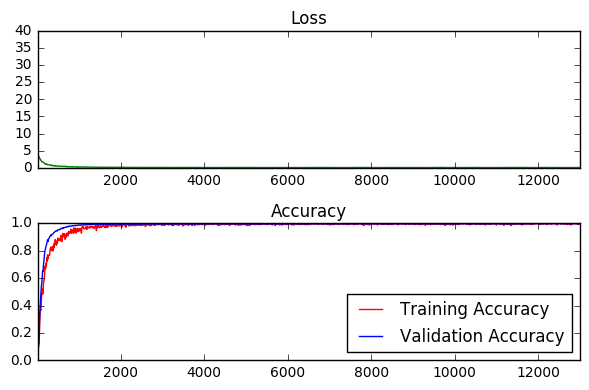

In [28]:
test_accuracy = session.run(accuracy, feed_dict = test_feed_dict)
print('Validation accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label = 'Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label = 'Validation Accuracy')
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.set_ylim([0, 1.0])
acc_plot.legend(loc = 4)
plt.tight_layout()
plt.show()

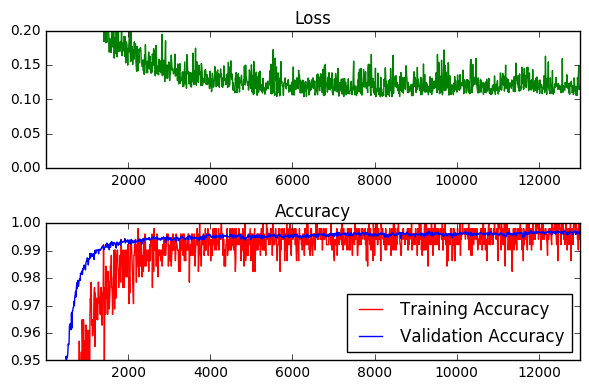

Validation accuracy at 0.9965569972991943
Test accuracy at 0.9669833779335022


In [29]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
loss_plot.set_ylim([0, 0.2])

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0.95, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc = 4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))
session.close()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Adam Optimizer was used to train the model; several batch size numbers were tried, and an acceptable compromise between speed and accuracy was found for a batch size of 512.  Better result could be possible with more epochs and further hyperparameter tuning.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** First, the LeNet implementation in the classroom was applied to this problem, but the performance was not so good as I expected, so I extended the network structure to extract low level features, then higher level features, and combined with the regularization of weights to improve the result.

The model was trained using stochastic gradient descent at the beginning, then changed to Adam Optimizer, because Adaptive Moment Estimation method works well in practice and compares favorably to other adaptive learning-method algorithms.

A convolutional layer doesn't fully connect on each layer, and shares weights.  It can learn special features from images, so it's very suitable for this classification problem.  Extending the LeNet structure to include more convolutional layers improved the performance greatly.

ReLUs are used in all but the output layer which is just a linear layer out of which the cross-entropy gets calculated.  Empirically, ReLUs work better than other activation functions, like softmax or tanh.  They may guarantee good convergence during training.

If time allows or computing resources are enough, hyperparameter tuning over learning rate, regularization, epochs, mu, sigma, and dropout, should be performed by grid search, or run in parallel.  To choose the best parameter set, both the speed and the accuracy need considering.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

['33.jpg', '13.jpg', '27.jpg', '25.jpg', '37.jpg']


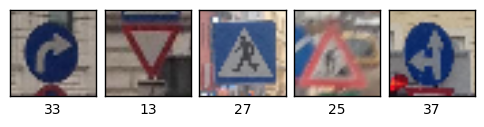

In [41]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2

figure, axes = plt.subplots(1, 5)
figure.subplots_adjust(hspace=0.2, wspace=0.1)
new_images = glob.glob('*.jpg')
print(new_images)
y_new = [int(y[:2]) for y in new_images]
X_new = []
for new_image in new_images:
    new_image = plt.imread(new_image)
    size = min(new_image.shape[:2])
    X_new.append(cv2.resize(new_image[:size, :size], (32, 32), interpolation =cv2.INTER_CUBIC))
    
for i, ax in enumerate(axes.flat):
    ax.imshow(X_new[i].squeeze())
    ax.set_xlabel("{0}".format(y_new[i]))
    ax.set_xticks([])
    ax.set_yticks([])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Candidate images are taken from the web, generated by the Google map.  Traffic pictures captured through a moving vehicle leading to motion blur and perspective distortions make classification more challenging.  Especially, the 'Pedestrians' sign doesn't show up in the traing set in this form.

In [42]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_new = np.array([preprocessing(img) for img in X_new], dtype = np.float32)
y_new = lb.transform(y_new).astype(np.float32)

session = tf.Session()
session.run(init)
saver.restore(session, './models/traffic_sign.ckpt')

new_feed_dict = {x_image: X_new, y_true: y_new, keep_prob: 1.0}
new_accuracy = session.run(accuracy, feed_dict = new_feed_dict)
print('New accuracy at {}'.format(new_accuracy))

New accuracy at 0.800000011920929


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model predicted 4 out of 5 signs correctly, so it's 80% accurate.  Compared to testing on the dataset, this classifier is not able to perform equally well on captured pictures.  The 'Pedestrians' sign didn't get recognized, but for others that appear in the training set, it gives out correct predictions.

In [43]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
y_new_predicted = session.run(tf.nn.top_k(y_pred, 5), feed_dict = new_feed_dict)
y_new_predicted.values.round(2), y_new_predicted.indices

(array([[ 0.56      ,  0.36000001,  0.02      ,  0.01      ,  0.01      ],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.38999999,  0.37      ,  0.19      ,  0.01      ,  0.01      ],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]], dtype=float32),
 array([[33, 35, 37, 34,  1],
        [13,  1, 17, 14, 12],
        [38, 18, 20, 36, 25],
        [25, 11, 24, 18, 20],
        [37, 35, 18, 39, 26]], dtype=int32))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** For correct predictions, the model is at least more than 50% certain; for the traffic sign not appearing in the training set, it tends to predict as more general class.  According to the count of each kind, balancing data maybe improve the result.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.